In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the Titanic dataset (You can download it from various sources online)
# Replace 'titanic.csv' with the correct path to your dataset file.
titanic_data = pd.read_csv('Titanic.csv')

In [36]:
# Data preprocessing
# You can choose which features to use, but for this example, let's use 'Pclass', 'Sex', 'Age', 'Fare'
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic_data['Survived']

In [37]:
# Use LabelEncoder to encode the 'Sex' feature
le = LabelEncoder()
X.loc[:, 'Sex'] = le.fit_transform(X['Sex'])

In [38]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [41]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [43]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



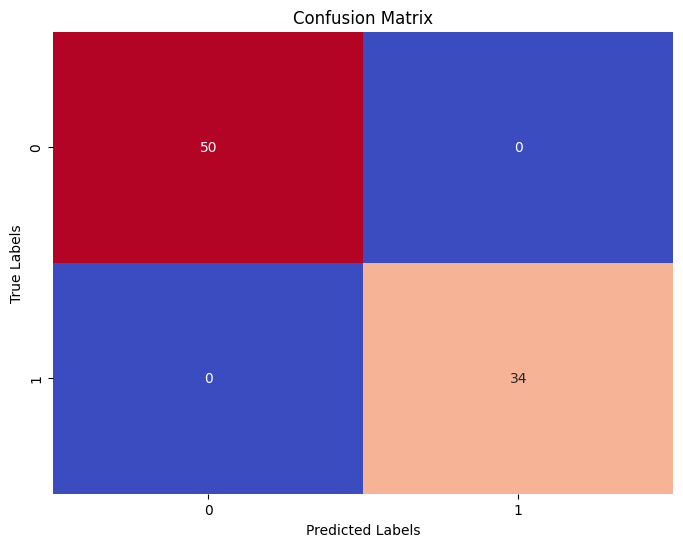

In [45]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Calculate survival rate by passenger class (Pclass)
pclass_survival = titanic_data.groupby('Pclass')['Survived'].mean().reset_index()

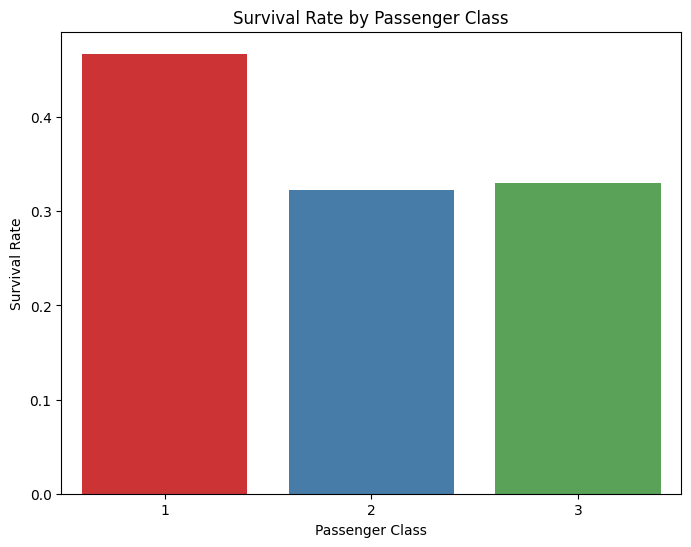

In [48]:
# Create a bar plot for survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=pclass_survival, palette='Set1')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [56]:
# Define age groups (e.g., children, adults, seniors)
age_bins = [0, 18, 35, 60, 100]
age_labels = ['Children', 'Young Adults', 'Adults', 'Seniors']

In [57]:
# Create a new column 'AgeGroup' to represent the age groups
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)

In [58]:
# Calculate survival rate by age group
age_survival = titanic_data.groupby('AgeGroup')['Survived'].mean().reset_index()

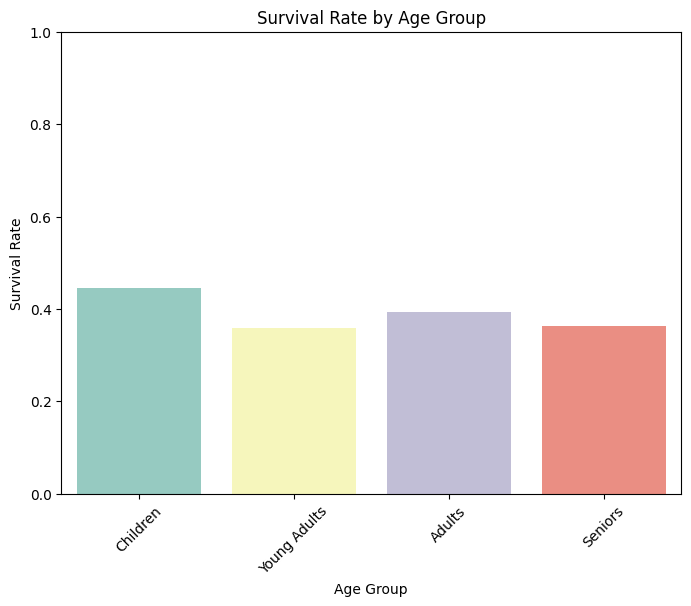

In [59]:
# Create a bar plot for survival rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_survival, palette='Set3')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set the y-axis limit to ensure it ranges from 0 to 1 (0% to 100%)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()